![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import re
from collections import Counter

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


**Подробнее по признакам:**
* Restaurant_id: идентификационный номер ресторана
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
28289,id_9674,London,NaN,9683.0,NaN,8.0,"[['r&p top notch', 'Rice and Peas is great!'],...",/Restaurant_Review-g186338-d4911699-Reviews-Ri...,d4911699,1,5.0
6537,id_6537,Paris,['Japanese'],9378.0,$$ - $$$,3.0,"[[], []]",/Restaurant_Review-g187147-d12511272-Reviews-K...,d12511272,0,0.0
9291,id_9291,Barcelona,['Cafe'],5324.0,$,2.0,"[[], []]",/Restaurant_Review-g187497-d12550844-Reviews-S...,d12550844,0,0.0
7585,id_7585,Paris,NaN,13691.0,NaN,11.0,"[['Open late, good location, regular service',...",/Restaurant_Review-g187147-d8305023-Reviews-Mc...,d8305023,0,0.0
6721,id_6721,Edinburgh,"['Steakhouse', 'Seafood', 'European']",801.0,$$ - $$$,46.0,"[['Long overdue proper restaurant in Balerno',...",/Restaurant_Review-g186525-d4026569-Reviews-Gr...,d4026569,0,0.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data

# Functions

In [15]:
plt.rcParams['figure.figsize'] = (15,7)


def fix_cuisine(x):  # чистит знаки препинания
    if pd.isnull(x):
        return 'Unknown'
    x = x.replace('[', '')
    x = x.replace(']', '')
    x = x.replace("'", '')
    return x


def clean_review(x):  # заменяет пропуски на пустые списки
    if pd.isnull(x):
        return "[[], []]"
    else:
        return x
    

def get_dates(x):  # находит даты по шаблону в строке
    pattern = re.compile('\d+/\d+/\d+')
    x = pattern.findall(x)
    return x


def get_season(x):  # указывает сезон по месяцу
    if (3 <= x <= 5):
        return 'spring'
    elif (6 <= x <= 8):
        return 'summer'
    elif (9 <= x <= 11):
        return 'autumn'
    elif (x==1 or x==2 or x==12):
        return 'winter'

In [16]:
# количество уникальных - какие признаки категориальные? > City, Price Range, Cuisine Style?
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

### Number of Reviews

In [17]:
# добавим столбец с пропусками в этом столбце
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [18]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [19]:
# заполним пропуски 0
data['Number of Reviews'].fillna(0, inplace=True)

### Restaurant_id - добавлены признаки restaurant_id_number, repeated_restaurant, unique_restaurant

In [20]:
# пропусков в столбце нет, добавим столбец с id ресторана в числовом виде
data['restaurant_id_number'] = data['Restaurant_id'].str.split('id_').apply(lambda x: x[1])
data['restaurant_id_number'] = data['restaurant_id_number'].apply(lambda x: int(x))

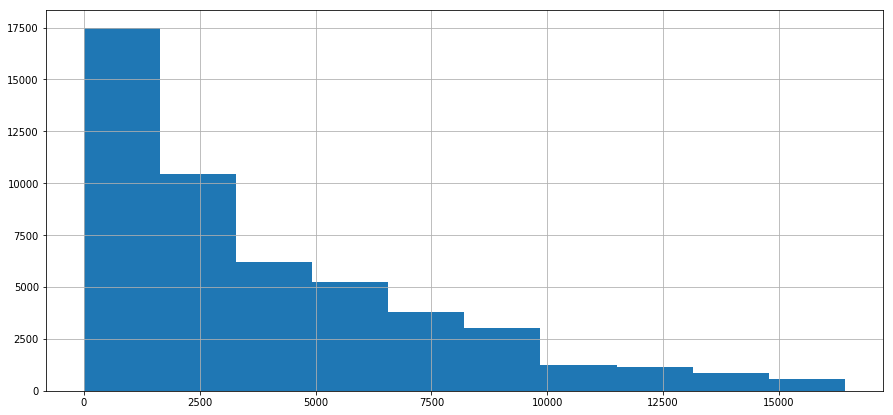

In [21]:
# посмотрим на распределение признака
data['restaurant_id_number'].hist()

In [22]:
data['Restaurant_id'].nunique()

13094

In [23]:
# количество уникальных Restaurant id говорит о наличии повторов, создадим список повторяющихся значений
repeated_restaurants = list(data['Restaurant_id'].value_counts()[data['Restaurant_id'].value_counts() > 1].index)

In [24]:
# добавим два столбца наподобие dummy переменной, со значением 1 для повторяющихся и 0 для неповторяющихся Restaurant id в первом столбце и наоборот - во втором
data['repeated_restaurant'] = data[data['Restaurant_id'].isin(repeated_restaurants)].Restaurant_id.apply(lambda x: 1)
data['unique_restaurant'] = data[~data['Restaurant_id'].isin(repeated_restaurants)].Restaurant_id.apply(lambda x: 1)

In [25]:
# заполним NaN в новых столбцах нулями
data['repeated_restaurant'].fillna(0, inplace=True)
data['unique_restaurant'].fillna(0, inplace=True)

### City

In [26]:
# посмотрим на список городов
data['City'].value_counts(dropna=False)

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

In [27]:
data['City'].nunique()

31

In [28]:
# создадим dummy переменную на базе столбца City
data = pd.get_dummies(data, columns=['City'])

In [29]:
data.sample(3)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,restaurant_id_number,repeated_restaurant,unique_restaurant,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
18245,id_814,NaN,815.0,NaN,6.0,"[[], []]",/Restaurant_Review-g189180-d12315334-Reviews-R...,d12315334,1,4.5,0,814,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
29621,id_3812,NaN,3814.0,NaN,6.0,"[['excellent food, very short list of wines......",/Restaurant_Review-g187514-d10813435-Reviews-L...,d10813435,1,4.5,0,3812,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24724,id_10913,['Italian'],10915.0,$,0.0,"[[], []]",/Restaurant_Review-g187147-d9595693-Reviews-Mi...,d9595693,1,4.0,1,10913,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Cuisine Style - добавлен признак cuisine_number

In [30]:
# очистим названия в столбце Cuisine Style от знаков препинания
data['Cuisine Style'] = data['Cuisine Style'].apply(fix_cuisine)

In [31]:
# посчитаем количество уникальных кухонь
len(Counter(data['Cuisine Style'].str.cat(sep=', ').split(', ')).most_common())

126

In [32]:
# самая популярная кухня
Counter(data['Cuisine Style'].str.cat(sep=', ').split(', ')).most_common(1)

[('Vegetarian Friendly', 14021)]

In [33]:
# добавим столбец с количеством кухонь для каждого ресторана и посчитаем среднее для всех
data['cuisine_split'] = data['Cuisine Style'].str.split(', ')
data['cuisine_number'] = data['cuisine_split'].apply(len)
data['cuisine_number'].mean()

2.62532

### Price Range

In [34]:
data['Price Range'].value_counts(dropna = False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [35]:
# значения можно заменить на числа, создадим словарь для замены
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
data['Price Range'] = data['Price Range'].replace(to_replace=price_dict)

In [36]:
data['Price Range'].fillna(0, inplace=True)
data['Price Range'].value_counts(dropna=False)

2.0    23041
0.0    17361
1.0     7816
3.0     1782
Name: Price Range, dtype: int64

### Reviews - добавлены признаки date_interval, review_date1_month, review_date2_month, review_date1_weekday, review_date2_weekday, review_date1_day, review_date2_day, review_date1_year, review_date2_year, date_interval_365

In [37]:
# заменим пропуски на пустые списки
data['Reviews'] = data['Reviews'].apply(clean_review)

In [38]:
# добавим столбец с датами
data['reviews_dates'] = data['Reviews'].apply(get_dates)

In [39]:
# добавим столбцы для каждой даты
data['review_date1'] = data['reviews_dates'].astype(str).apply(lambda x: None if x.strip() == '' else x[2:12])
data['review_date2'] = data['reviews_dates'].astype(str).apply(lambda x: None if x.strip() == '' else x[16:26])
data['review_date1'] = data['review_date1'].fillna('00/00/0000')
data['review_date2'] = data['review_date2'].fillna('00/00/0000')

In [40]:
# преобразуем их в формат datetime
data['review_date1'] = pd.to_datetime(data['review_date1'])
data['review_date2'] = pd.to_datetime(data['review_date2'], errors='coerce')
date1 = pd.to_datetime(data['review_date2'],format='%Y-%m-%d %H:%M:%S', errors='coerce')
date2 = pd.to_datetime(data['review_date2'],format='%Y-%m-%d', errors='coerce')
data['review_date2'] = date1.combine_first(date2)

In [41]:
data['review_date1'].max()

Timestamp('2018-02-26 00:00:00')

In [42]:
data['review_date2'].max()

Timestamp('2018-02-26 00:00:00')

In [43]:
# добавим разницу в днях между датами
data['date_interval'] = abs(data['review_date2'] - data['review_date1']).dt.days.fillna(0)

In [44]:
data['date_interval'].max()

3296.0

In [45]:
# проверим это максимальное значение
data[data['date_interval'] == data['date_interval'].max()]

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,restaurant_id_number,repeated_restaurant,unique_restaurant,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,...,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,cuisine_split,cuisine_number,reviews_dates,review_date1,review_date2,date_interval
1966,id_1966,Unknown,1117.0,0.0,2.0,"[['Mixed feelings', 'Bear & Karaoke place.'], ...",/Restaurant_Review-g189934-d1199811-Reviews-Ba...,d1199811,0,0.0,0,1966,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unknown],1,"[11/14/2017, 11/05/2008]",2017-11-14,2008-11-05,3296.0


In [46]:
# и что указано в исходном Reviews
list(data[data['date_interval'] == data['date_interval'].max()]['Reviews'])

["[['Mixed feelings', 'Bear & Karaoke place.'], ['11/14/2017', '11/05/2008']]"]

In [47]:
# проверим сколько процентов приходится на интервал между отзывами не больше года
data['date_interval'][data['date_interval'] < 365].count() / data['date_interval'].count()

0.93186

In [48]:
# попробуем добавить признак на основе этого
data['date_interval_365'] = data['date_interval'].apply(lambda x: 1 if (x < 366 and x > 0) else 0)

In [49]:
data['review_date1'].min()

Timestamp('2004-04-21 00:00:00')

In [50]:
data['review_date2'].min()

Timestamp('2007-11-14 00:00:00')

In [51]:
# добавим столбцы день, месяц, год, день недели на основе дат
data['review_date1_month'] = data['review_date1'].dt.month.fillna(0)
data['review_date2_month'] = data['review_date2'].dt.month.fillna(0)
data['review_date1_weekday'] = data['review_date1'].dt.weekday.fillna(0)
data['review_date2_weekday'] = data['review_date2'].dt.weekday.fillna(0)
data['review_date1_day'] = data['review_date1'].dt.day.fillna(0)
data['review_date2_day'] = data['review_date2'].dt.day.fillna(0)
data['review_date1_year'] = data['review_date1'].dt.year.fillna(0)
data['review_date2_year'] = data['review_date2'].dt.year.fillna(0)

In [52]:
data['review_date1_season'] = data['review_date1_month'].apply(get_season)
data['review_date2_season'] = data['review_date2_month'].apply(get_season)

In [53]:
data = pd.get_dummies(data, columns=[ 'review_date1_season',], dummy_na=True)
data = pd.get_dummies(data, columns=[ 'review_date2_season',], dummy_na=True)

После добавления только сезона в модель, MAE увеличился, поэтому в финальную функцию эти столбцы не входят

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.

### Посмотрим распределение признака

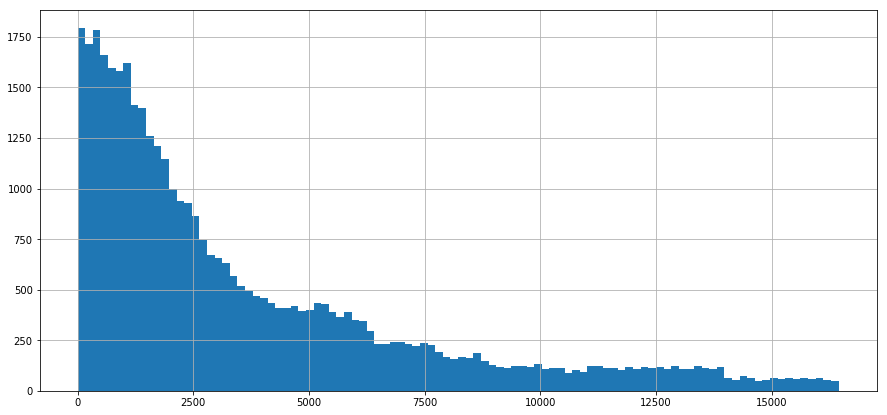

In [54]:
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

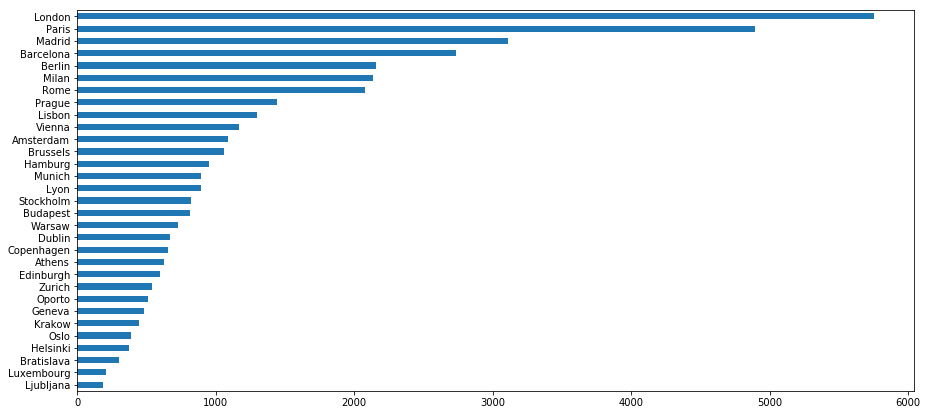

In [55]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

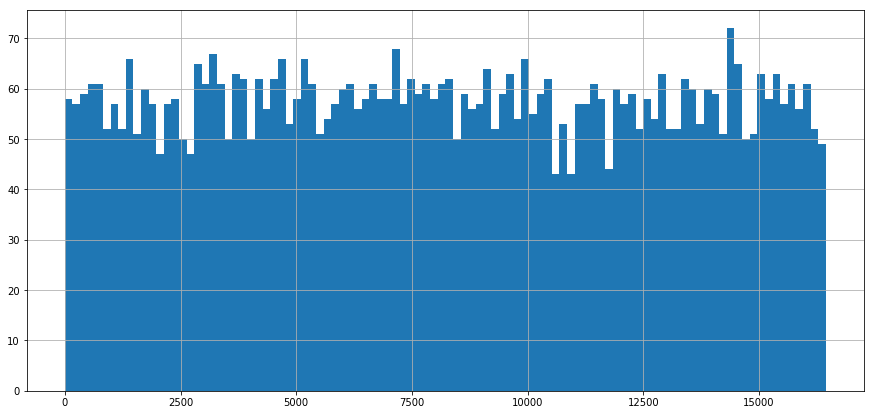

In [56]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

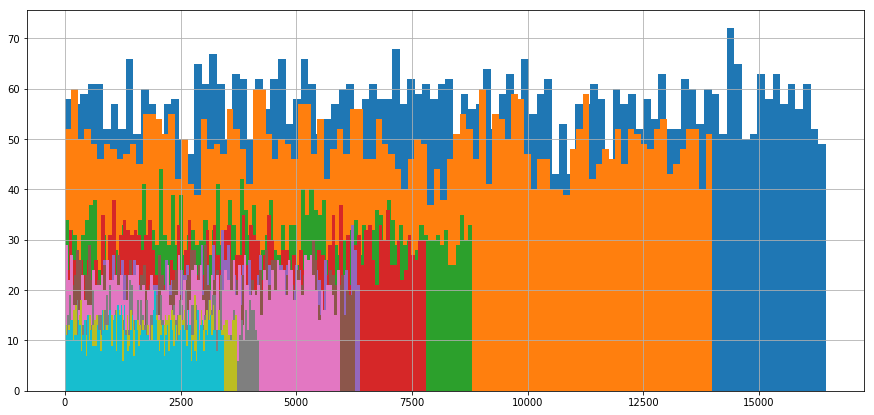

In [57]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

In [58]:
city = set(df_train.City)
city_dict = {}
for c in city:
    n = str(c)
    max_val = df_train[df_train.City == c]['Ranking'].max()
    city_dict.setdefault(c,max_val)

In [59]:
df_train['city_rank_max'] = df_train['City'].replace(to_replace = city_dict)
df_train.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,city_rank_max
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1,13986.0
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,2464.0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,16444.0
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1,6372.0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1,2763.0


In [60]:
df_train['Ranking2'] = round(df_train['Ranking']/df_train['city_rank_max']*100,1)
df_train.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,city_rank_max,Ranking2
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,1,13986.0,39.8
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,2464.0,62.4
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,16444.0,2.1
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1,6372.0,54.3
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1,2763.0,22.5


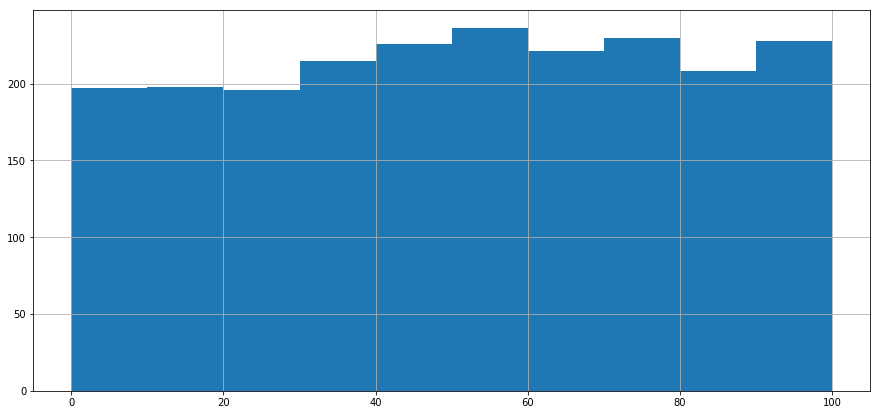

In [61]:
df_train['Ranking2'][df_train['City'] =='Berlin'].hist()

### Посмотрим распределение целевой переменной

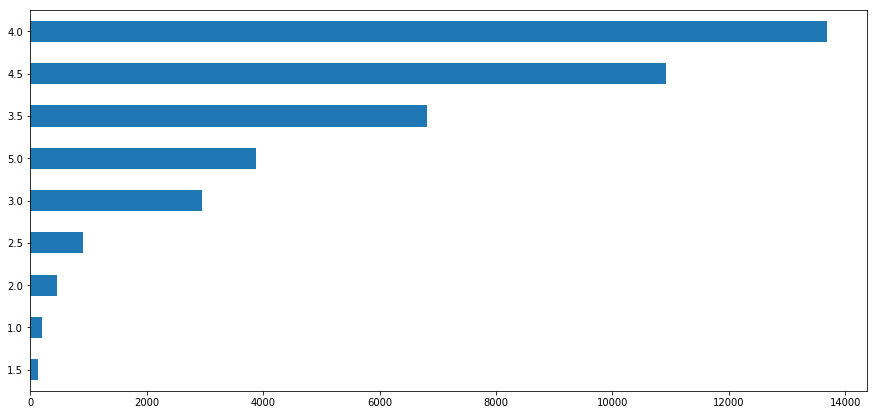

In [62]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

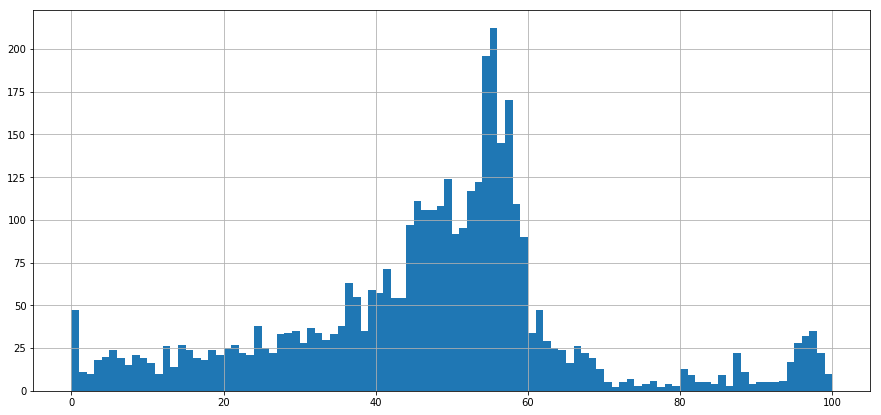

In [63]:
df_train['Ranking2'][df_train['Rating'] == 5].hist(bins=100)

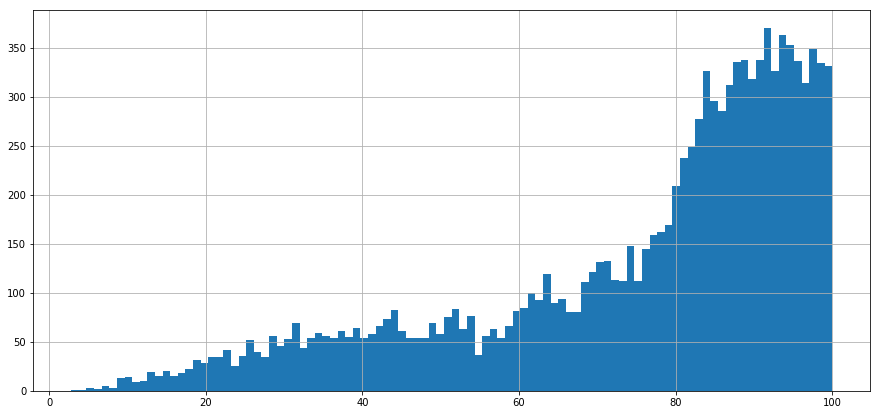

In [64]:
df_train['Ranking2'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

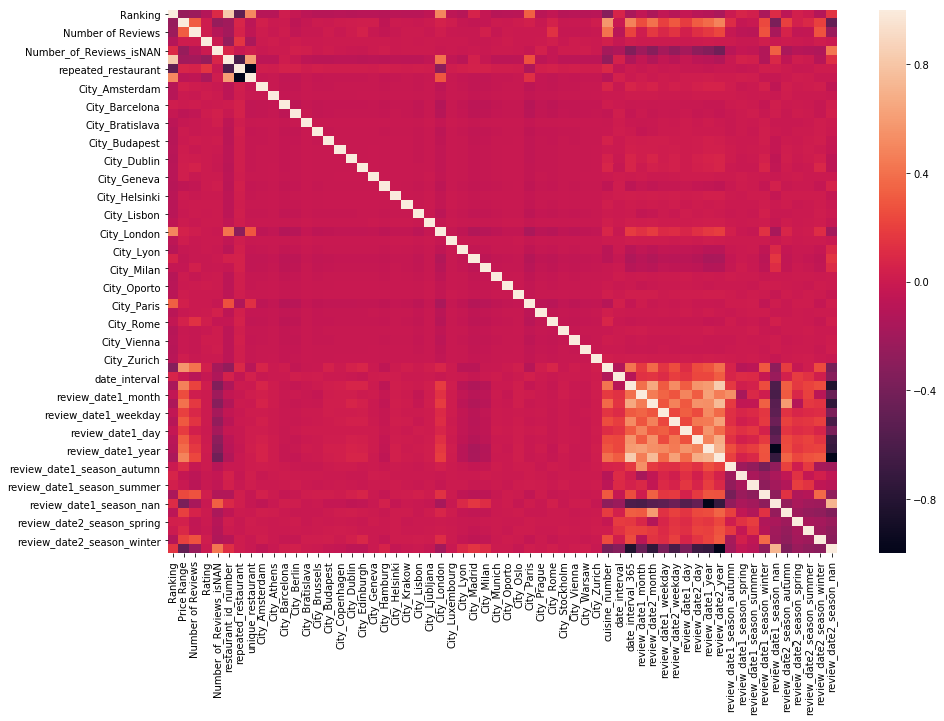

In [65]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [66]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [67]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    df_output.drop(['ID_TA','URL_TA'], axis = 1, inplace=True)
    
    def fix_cuisine(x):  # чистит знаки препинания
        if pd.isnull(x):
            return 'Unknown'
        x = x.replace('[', '')
        x = x.replace(']', '')
        x = x.replace("'", '')
        return x


    def clean_review(x):  # заменяет пропуски на пустые списки
        if pd.isnull(x):
            return "[[], []]"
        else:
            return x
    

    def get_dates(x):  # находит даты по шаблону в строке
        pattern = re.compile('\d+/\d+/\d+')
        x = pattern.findall(x)
        return x
       
    # ################### 2. NAN ############################################################## 
    df_output['Number of Reviews'].fillna(0, inplace=True)
           
    # ################### 3. Encoding ############################################################## 
    city = set(df_output.City)
    city_dict = {}
    for c in city:
        n = str(c)
        max_val = df_output[df_output.City == c]['Ranking'].max()
        city_dict.setdefault(c,max_val)
        
    df_output['city_rank_max'] = df_output['City'].replace(to_replace = city_dict)
    df_output['Ranking2'] = round(df_output['Ranking']/df_output['city_rank_max']*100,1)
        
    df_output = pd.get_dummies(df_output, columns=[ 'City',])
    price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
    df_output['Price Range'] = df_output['Price Range'].replace(to_replace=price_dict)
    df_output['Price Range'].fillna(0, inplace=True)
               
    # ################### 4. Feature Engineering ####################################################
    df_output['restaurant_id_number'] = df_output['Restaurant_id'].str.split('id_').apply(lambda x: x[1])
    df_output['restaurant_id_number'] = df_output['restaurant_id_number'].apply(lambda x: int(x))
    
    repeated_restaurants = list(df_output['Restaurant_id'].value_counts()[df_output['Restaurant_id'].value_counts() > 1].index)
    df_output['repeated_restaurant'] = df_output[df_output['Restaurant_id'].isin(repeated_restaurants)].Restaurant_id.apply(lambda x: 1)
    df_output['unique_restaurant'] = df_output[~df_output['Restaurant_id'].isin(repeated_restaurants)].Restaurant_id.apply(lambda x: 1)
    df_output['repeated_restaurant'].fillna(0, inplace=True)
    df_output['unique_restaurant'].fillna(0, inplace=True)
    
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(fix_cuisine)
    df_output['cuisine_split'] = df_output['Cuisine Style'].str.split(', ')
    df_output['cuisine_number'] = df_output['cuisine_split'].apply(len)

    df_output['Reviews'] = df_output['Reviews'].apply(clean_review)
    df_output['reviews_dates'] = df_output['Reviews'].apply(get_dates)
    df_output['review_date1'] = df_output['reviews_dates'].astype(str).apply(lambda x: None if x.strip() == '' else x[2:12])
    df_output['review_date2'] = df_output['reviews_dates'].astype(str).apply(lambda x: None if x.strip() == '' else x[16:26])
    df_output['review_date1'] = df_output['review_date1'].fillna('00/00/0000')
    df_output['review_date2'] = df_output['review_date2'].fillna('00/00/0000')
    df_output['review_date1'] = pd.to_datetime(df_output['review_date1'])
    df_output['review_date2'] = pd.to_datetime(df_output['review_date2'], errors='coerce')
    date1 = pd.to_datetime(df_output['review_date2'],format='%Y-%m-%d %H:%M:%S', errors='coerce')
    date2 = pd.to_datetime(df_output['review_date2'],format='%Y-%m-%d', errors='coerce')
    df_output['review_date2'] = date1.combine_first(date2)
    df_output['date_interval'] = abs(df_output['review_date2'] - df_output['review_date1']).dt.days.fillna(0)
    df_output['review_date1_month'] = df_output['review_date1'].dt.month.fillna(0)
    df_output['review_date2_month'] = df_output['review_date2'].dt.month.fillna(0)
    df_output['review_date1_weekday'] = df_output['review_date1'].dt.weekday.fillna(0)
    df_output['review_date2_weekday'] = df_output['review_date2'].dt.weekday.fillna(0)
    df_output['review_date1_day'] = df_output['review_date1'].dt.day.fillna(0)
    df_output['review_date2_day'] = df_output['review_date2'].dt.day.fillna(0)
    df_output['review_date1_year'] = df_output['review_date1'].dt.year.fillna(0)
    df_output['review_date2_year'] = df_output['review_date2'].dt.year.fillna(0)
    df_output['date_interval_365'] = df_output['date_interval'].apply(lambda x: 1 if (x < 366 and x > 0) else 0)
                
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    df_output.drop(['Restaurant_id','review_date1', 'review_date2'], axis = 1, inplace=True)
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

#### Запускаем и проверяем что получилось

In [68]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,city_rank_max,Ranking2,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,...,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,restaurant_id_number,repeated_restaurant,unique_restaurant,cuisine_number,date_interval,review_date1_month,review_date2_month,review_date1_weekday,review_date2_weekday,review_date1_day,review_date2_day,review_date1_year,review_date2_year,date_interval_365
20384,4489.0,0.0,3.0,1,4.5,6372.0,70.4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,4487,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17447,5971.0,2.0,123.0,1,4.0,16444.0,36.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,5962,1.0,0.0,2,193.0,12.0,6.0,2.0,5.0,13.0,3.0,2017.0,2017.0,1
47139,1412.0,1.0,715.0,1,4.0,5948.0,23.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1411,1.0,0.0,3,33.0,11.0,10.0,0.0,2.0,27.0,25.0,2017.0,2017.0,1
21072,10571.0,1.0,33.0,1,3.5,16444.0,64.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,10561,0.0,1.0,3,278.0,1.0,3.0,1.0,3.0,2.0,30.0,2018.0,2017.0,1
41696,2289.0,2.0,26.0,1,4.0,3254.0,70.3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2283,1.0,0.0,4,43.0,11.0,9.0,4.0,3.0,11.0,29.0,2016.0,2016.0,1
45053,15513.0,2.0,20.0,1,3.5,16444.0,94.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,15501,0.0,1.0,1,512.0,12.0,7.0,4.0,3.0,2.0,9.0,2016.0,2015.0,0
24366,1486.0,2.0,132.0,1,4.0,7796.0,19.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1485,1.0,0.0,4,208.0,6.0,1.0,1.0,6.0,13.0,7.0,2017.0,2018.0,1
28485,842.0,2.0,81.0,1,3.5,1787.0,47.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,840,1.0,0.0,2,21.0,10.0,10.0,5.0,5.0,28.0,7.0,2017.0,2017.0,1
37177,5825.0,0.0,0.0,1,4.0,8809.0,66.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,5822,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4386,1862.0,2.0,421.0,0,0.0,5948.0,31.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,4386,1.0,0.0,4,31.0,11.0,10.0,3.0,0.0,23.0,23.0,2017.0,2017.0,1


In [69]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 52 columns):
Ranking                 50000 non-null float64
Price Range             50000 non-null float64
Number of Reviews       50000 non-null float64
sample                  50000 non-null int64
Rating                  50000 non-null float64
city_rank_max           50000 non-null float64
Ranking2                50000 non-null float64
City_Amsterdam          50000 non-null uint8
City_Athens             50000 non-null uint8
City_Barcelona          50000 non-null uint8
City_Berlin             50000 non-null uint8
City_Bratislava         50000 non-null uint8
City_Brussels           50000 non-null uint8
City_Budapest           50000 non-null uint8
City_Copenhagen         50000 non-null uint8
City_Dublin             50000 non-null uint8
City_Edinburgh          50000 non-null uint8
City_Geneva             50000 non-null uint8
City_Hamburg            50000 non-null uint8
City_Helsinki           

In [70]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [71]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [72]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 51), (40000, 51), (40000, 50), (32000, 50), (8000, 50))

# Model 
Сам ML

In [73]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [74]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [75]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [76]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20356625


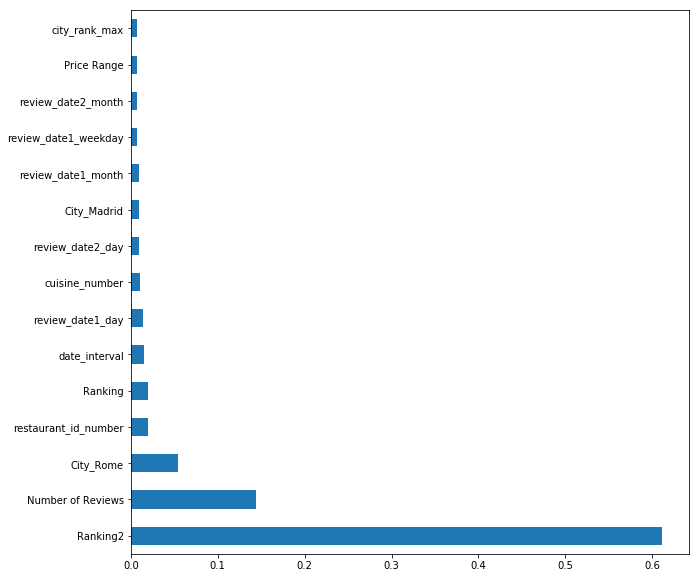

In [77]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [78]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,city_rank_max,Ranking2,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,City_Brussels,City_Budapest,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,...,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,restaurant_id_number,repeated_restaurant,unique_restaurant,cuisine_number,date_interval,review_date1_month,review_date2_month,review_date1_weekday,review_date2_weekday,review_date1_day,review_date2_day,review_date1_year,review_date2_year,date_interval_365
8798,1320.0,0.0,12.0,0.0,4188.0,31.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,8798,1.0,0.0,1,7.0,7.0,7.0,6.0,6.0,23.0,16.0,2017.0,2017.0,1
5875,95.0,2.0,544.0,0.0,4188.0,2.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,5875,1.0,0.0,7,3.0,1.0,1.0,1.0,5.0,9.0,6.0,2018.0,2018.0,1
5223,3993.0,1.0,52.0,0.0,6372.0,62.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,5223,1.0,0.0,4,224.0,2.0,10.0,1.0,1.0,28.0,10.0,2017.0,2017.0,1
3435,1445.0,0.0,0.0,0.0,1766.0,81.8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,3435,1.0,0.0,1,0.0,7.0,0.0,1.0,0.0,11.0,0.0,2017.0,0.0,0
7127,1345.0,2.0,429.0,0.0,13986.0,9.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,7127,1.0,0.0,4,225.0,5.0,12.0,2.0,3.0,17.0,28.0,2017.0,2017.0,1
3601,3707.0,2.0,56.0,0.0,8809.0,42.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,3601,1.0,0.0,2,672.0,7.0,9.0,4.0,4.0,7.0,4.0,2017.0,2015.0,0
206,2436.0,2.0,444.0,0.0,16444.0,14.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,206,1.0,0.0,5,32.0,12.0,11.0,1.0,4.0,5.0,3.0,2017.0,2017.0,1
579,2555.0,2.0,31.0,0.0,3006.0,85.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,579,1.0,0.0,2,0.0,8.0,0.0,1.0,0.0,15.0,0.0,2017.0,0.0,0
8858,8375.0,0.0,7.0,0.0,13986.0,59.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,8858,1.0,0.0,1,0.0,6.0,0.0,6.0,0.0,25.0,0.0,2017.0,0.0,0
9874,8140.0,0.0,0.0,0.0,13986.0,58.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,9874,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [79]:
test_data = test_data.drop(['Rating'], axis=1)

In [80]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [81]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [82]:
predict_submission

array([3.37 , 4.2  , 4.41 , ..., 3.105, 4.4  , 4.28 ])

In [83]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.370
1,id_1,4.200
2,id_2,4.410
3,id_3,4.340
4,id_4,4.405
5,id_5,4.415
6,id_6,2.025
7,id_7,2.955
8,id_8,4.175
9,id_9,4.600


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
